In [2]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2



In [123]:
from PIL import Image
img = Image.open('greyscale.png').convert('L')
img.save('greyscale.png')

In [124]:
# from PIL import Image

# resized_image = img.resize((160,90,3))
img = mpimg.imread('greyscale.png')

img.shape


(101, 71)

In [62]:
img

array([[0.32941177, 0.32941177, 0.33333334, ..., 0.36862746, 0.3647059 ,
        0.3647059 ],
       [0.33333334, 0.33333334, 0.33333334, ..., 0.36862746, 0.3647059 ,
        0.3647059 ],
       [0.33333334, 0.33333334, 0.3372549 , ..., 0.37254903, 0.36862746,
        0.36862746],
       ...,
       [0.34509805, 0.34901962, 0.34901962, ..., 0.38431373, 0.38431373,
        0.38431373],
       [0.34901962, 0.34901962, 0.3529412 , ..., 0.3882353 , 0.3882353 ,
        0.3882353 ],
       [0.34901962, 0.3529412 , 0.3529412 , ..., 0.39215687, 0.39215687,
        0.39215687]], dtype=float32)

In [113]:
# cat = mpimg.imread('th-2057102511')
img = Image.open('cat.png').convert('L')
img.save('cat.png')

In [122]:
cat = mpimg.imread('cat.png')
cat.shape

(101, 71)

In [125]:
f1 = np.fft.fft2(img)
# fshift1 = np.fft.fftshift(f1)
# phase_spect_a = np.angle(fshift1)
# mag_spectruma = 20 * np.log(np.abs(fshift1))

In [126]:
f2 = np.fft.fft2(cat)
# fshift2 = np.fft.fftshift(f2)
# phase_spect_b = np.angle(fshift2)
# mag_spectrumb = 20 * np.log(np.abs(fshift2))

In [130]:
combined = np.multiply(np.abs(f1), np.exp(1j * np.angle(f2)))

In [131]:
combined_img =np.real(np.fft.ifft2(combined))
# combined_img= np.abs(combined_img)

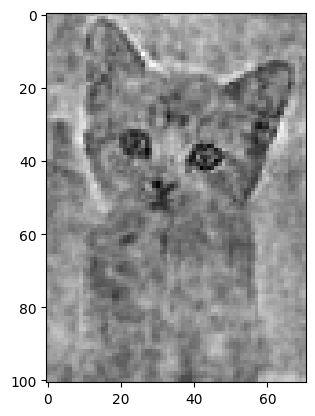

In [132]:
plt.imshow(combined_img, cmap='gray')

In [135]:
imgc =  mpimg.imread('th-2057102511.png')
catc = mpimg.imread('th-920915159.png')

In [136]:
f1 = np.fft.fft2(catc)
f2 = np.fft.fft2(imgc)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


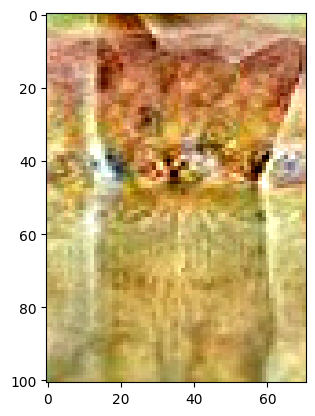

In [137]:
combined = np.multiply(np.abs(f1), np.exp(1j * np.angle(f2)))
combined_img =np.real(np.fft.ifft2(combined))
plt.imshow(combined_img, cmap='gray')

In [82]:
def mix_with_uniform_mag(phase_img):
    f_phase = np.fft.fft2(phase_img)
    print(phase_img.shape)
    combined = np.multiply(np.ones(f_phase.shape), np.exp(1j * np.angle(f_phase)))
    combined_img = np.real(np.fft.ifft2(np.abs(f_phase)))

    return combined_img

In [83]:
def RGB2Gray(path):
    image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

In [84]:
image = RGB2Gray('/home/dina/Pictures/th-920915159.png')


In [85]:
combined_img = mix_with_uniform_mag(image)

(101, 71)


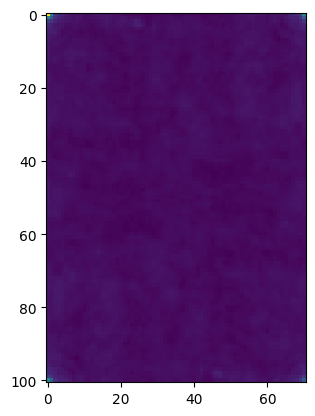

In [86]:
plt.imshow(combined_img)

In [87]:
cv2.imwrite('/home/dina/Downloads/phaseonly.png', combined_img)

True

In [104]:
def crop(x_start,x_end, y_start, y_end, dim, img, fill_value):
    for i in range(dim):
        for j in range(dim):
            if (x_start<j<x_end) and (y_start< i<y_end ):
                pass
            else:
                img[i][j] = fill_value

In [105]:
image = RGB2Gray('funny-cat-e1522100034583-2692798105.png')
crop(300,400, 100, 200, len(image), image, 1)

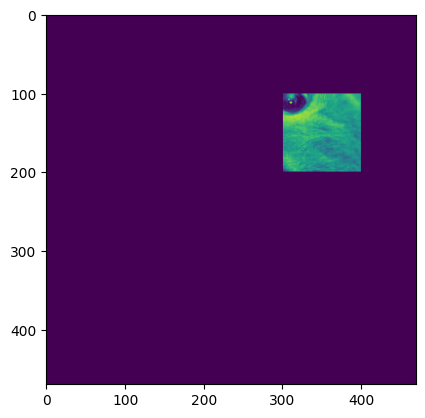

In [106]:
plt.imshow(image)